In [7]:
import numpy as np
import pandas as pd

In [8]:
df=pd.read_csv('AAPL.csv')

In [9]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.100323,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.095089,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.088110,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.090291,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.092908,73449600


In [10]:
df1=df.reset_index()['Close']

In [11]:
df1.shape

(10409,)

In [12]:
df1

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10404    163.979996
10405    165.380005
10406    168.820007
10407    170.210007
10408    174.070007
Name: Close, Length: 10409, dtype: float64

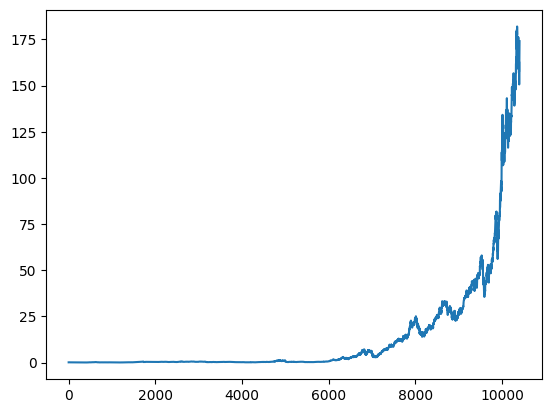

In [13]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [14]:
import numpy as np

In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [16]:
df1.shape

(10409, 1)

In [17]:
df1

array([[4.35483696e-04],
       [3.98684579e-04],
       [3.49613594e-04],
       ...,
       [9.27511961e-01],
       [9.35150965e-01],
       [9.56364315e-01]])

In [18]:
### splitting the data into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [19]:
training_size,test_size

(6765, 3644)

In [20]:
len(train_data),len(test_data)

(6765, 3644)

In [21]:
import numpy
def create_dataset(dataset,time_step=1):
    dataX,dataY= [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step),0]
        dataX.append(a)
        dataY.append(dataset[i + time_step,0])
    return numpy.array(dataX),numpy.array(dataY)

In [22]:
time_step = 100
X_train ,Y_train= create_dataset(train_data, time_step)
X_test , Y_test = create_dataset(test_data, time_step)

In [23]:
print(X_train)

[[0.00043548 0.00039868 0.00034961 ... 0.00042322 0.00042015 0.00040175]
 [0.00039868 0.00034961 0.00036495 ... 0.00042015 0.00040175 0.00041095]
 [0.00034961 0.00036495 0.00038335 ... 0.00040175 0.00041095 0.00041708]
 ...
 [0.02035073 0.02070794 0.02079823 ... 0.02979545 0.02971498 0.03005454]
 [0.02070794 0.02079823 0.02107301 ... 0.02971498 0.03005454 0.02985237]
 [0.02079823 0.02107301 0.0211947  ... 0.03005454 0.02985237 0.03041568]]


In [24]:
print(X_train.shape), print(Y_train.shape)

(6664, 100)
(6664,)


(None, None)

In [25]:
print(X_test.shape), print(Y_test.shape)

(3543, 100)
(3543,)


(None, None)

In [26]:
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1], 1)

In [27]:

import tensorflow as tf


In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [29]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [30]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
105/105 [==============================] - 19s 146ms/step - loss: 1.8324e-05 - val_loss: 0.0078
Epoch 2/100
105/105 [==============================] - 14s 137ms/step - loss: 2.3113e-07 - val_loss: 0.0081
Epoch 3/100
105/105 [==============================] - 19s 182ms/step - loss: 2.6112e-07 - val_loss: 0.0076
Epoch 4/100
105/105 [==============================] - 14s 133ms/step - loss: 3.3292e-07 - val_loss: 0.0075
Epoch 5/100
105/105 [==============================] - 14s 132ms/step - loss: 2.1622e-07 - val_loss: 0.0077
Epoch 6/100
105/105 [==============================] - 14s 132ms/step - loss: 3.2158e-07 - val_loss: 0.0079
Epoch 7/100
105/105 [==============================] - 14s 132ms/step - loss: 2.3876e-07 - val_loss: 0.0069
Epoch 8/100
105/105 [==============================] - 16s 148ms/step - loss: 1.9537e-07 - val_loss: 0.0059
Epoch 9/100
105/105 [==============================] - 14s 133ms/step - loss: 2.6331e-07 - val_loss: 0.0068
Epoch 10/100
105/105 [======

In [32]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)



111/111 [==============================] - 3s 26ms/step


In [33]:
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [34]:
import math
from sklearn.metrics import mean_squared_error

math.sqrt(mean_squared_error(Y_test,test_predict))


48.601076808547425

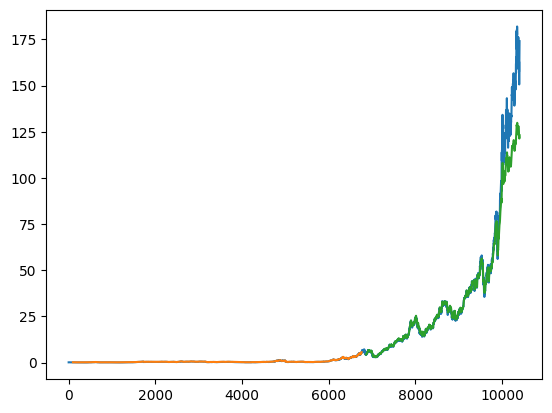

In [35]:
look_back=100
trainpredictPlot=numpy.empty_like(df1)
trainpredictPlot[:,:]=np.nan
trainpredictPlot[look_back:len(train_predict)+look_back,:]=train_predict
testpredictPlot=numpy.empty_like(df1)
testpredictPlot[:,:]=numpy.nan
testpredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1,:]=test_predict
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainpredictPlot)
plt.plot(testpredictPlot)
plt.show()

In [36]:
441-100



341

In [37]:
len(test_data)

3644

In [38]:
X_input=test_data[341:].reshape(1,-1)
X_input.shape

(1, 3303)

In [39]:
X_input=test_data[341:].reshape(1,-1)

In [40]:
X_input.shape

(1, 3303)

In [41]:
temp_input=list(X_input)
temp_input=temp_input[0].tolist()


In [42]:
temp_input

[0.018733421437248644,
 0.019214294008061773,
 0.019192706951397156,
 0.018283951219231244,
 0.018252548866435514,
 0.01752044648188351,
 0.017630360212355083,
 0.01679619193768718,
 0.017443897064296585,
 0.01762250687631289,
 0.01723584685957347,
 0.017259401372013525,
 0.016990502926101346,
 0.017074900184043944,
 0.017624468836401806,
 0.017167150778028734,
 0.016472342122225737,
 0.016042497000784035,
 0.017125933129101895,
 0.01792084571493188,
 0.018641170843263853,
 0.01855873554541017,
 0.018458637111069712,
 0.019290843425648702,
 0.01965591089003698,
 0.019675541482299205,
 0.01966965010634593,
 0.020861038005046444,
 0.020633357208061105,
 0.020631395247972188,
 0.021294807046665983,
 0.020702053289605837,
 0.020238849350966013,
 0.020362502297746533,
 0.021063202329502807,
 0.021852223539379514,
 0.022496004745811087,
 0.022978839276713132,
 0.022301693757396917,
 0.022560776907177983,
 0.023198666737656276,
 0.023326243604614633,
 0.02295136084409524,
 0.02281986005695905

In [50]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):

    if(len(temp_input)>100):
        #print(temp_input)
        X_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,X_input))
        X_input=X_input.reshape(1,-1)
        X_input = X_input.reshape((1, n_steps, 1))
        #print(X_input)
        yhat = model.predict(X_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        X_input = X_input.reshape((1, n_steps,1))
        yhat = model.predict(X_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

[0.00022527]
31
[0.00022527]
32
[0.00022527]
33
[0.00022527]
34
[0.00022527]
35
[0.00022527]
36
[0.00022527]
37
[0.00022527]
38
[0.00022527]
39
[0.00022527]
40
[0.00022527]
41
[0.00022527]
42
[0.00022527]
43
[0.00022527]
44
[0.00022527]
45
[0.00022527]
46
[0.00022527]
47
[0.00022527]
48
[0.00022527]
49
[0.00022527]
50
[0.00022527]
51
[0.00022527]
52
[0.00022527]
53
[0.00022527]
54
[0.00022527]
55
[0.00022527]
56
[0.00022527]
57
[0.00022527]
58
[0.00022527]
59
[0.00022527]
60
[[0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742], [0.00022526865359395742],

In [51]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [52]:
import matplotlib.pyplot as plt

In [53]:
len(df1)

10409

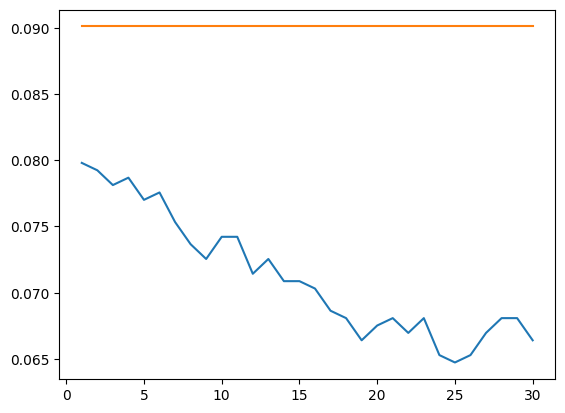

In [55]:
import matplotlib.pyplot as plt

# Assuming day_new and lst_output have already been defined
# Make sure they have the same length
day_new = day_new[:len(lst_output)]

plt.plot(day_new, scaler.inverse_transform(df1[1158:][:len(lst_output)]))
plt.plot(day_new, scaler.inverse_transform(lst_output))
plt.show()


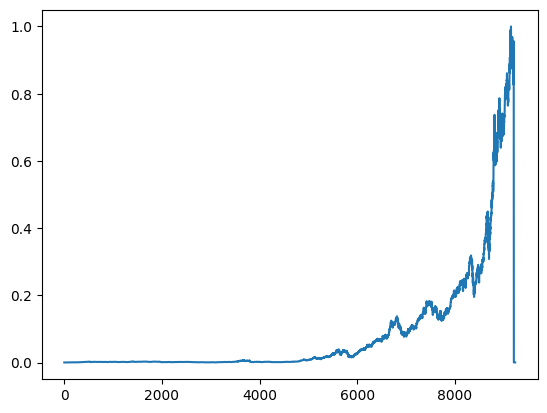

In [56]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [57]:
df3=scaler.inverse_transform(df3).tolist()

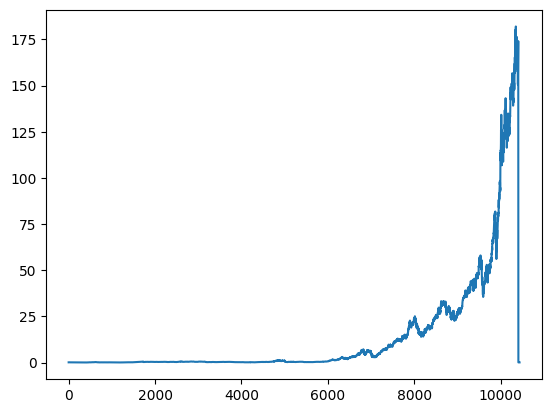

In [58]:
plt.plot(df3)